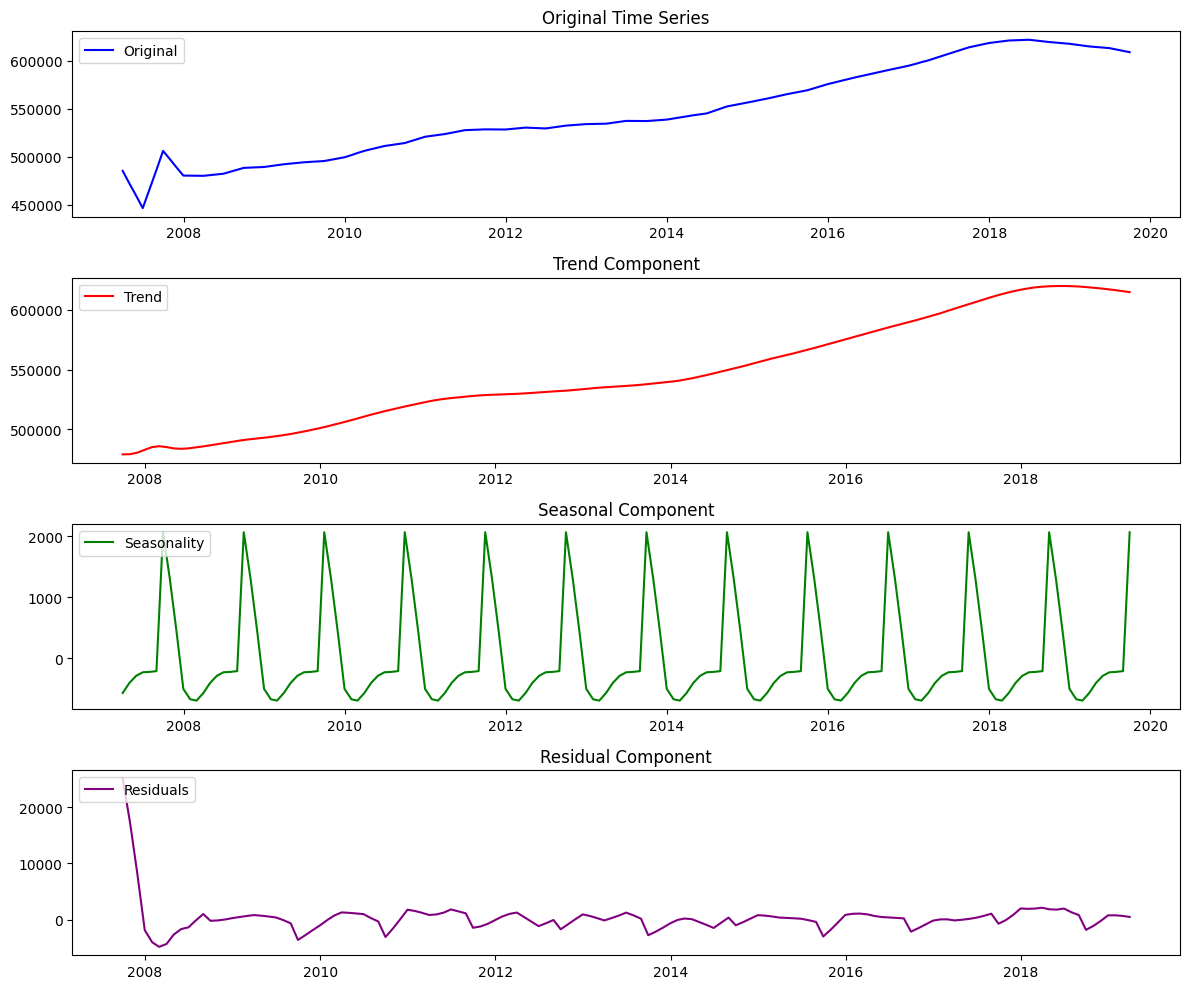

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "/content/ma_lga_12345.csv"
df = pd.read_csv(file_path)

# Convert 'saledate' to datetime format and set as index
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")
df.set_index('saledate', inplace=True)

# Resample data monthly and fill missing values
monthly_df = df['MA'].resample('ME').mean().interpolate()  # or use .dropna()

# Decompose the time series
decomposition = seasonal_decompose(monthly_df, model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_df, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='red')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='purple')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
